<a href="https://colab.research.google.com/github/rajeshvalluri/MNIST_TF/blob/master/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import image
from scipy import *
%matplotlib inline


In [ ]:
#Load the MNIST files from Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
input_shape = 784

In [ ]:
#Load data and labels into X_train and y_train respectively
X_train = []
y_train = []
for rows in data_list:
  X_train.append(np.asfarray(rows.split(',')[1:]))
  y_train.append(int(rows.split(',')[0]))

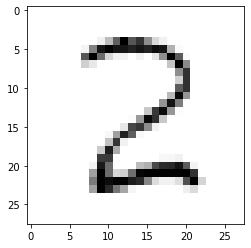

In [ ]:
#Check a couple of images and their corresponding labels.
X_train = np.array(X_train)/255.0 #scaling input data to be between 0 and 1
y_train = np.array(y_train)
matplotlib.pyplot.imshow(X_train[1900].reshape([28,28]),cmap='Greys',interpolation='None')

In [ ]:
model = Sequential()
model.add(Dense(units=input_shape,activation=None))
model.add(Dense(units = 100,activation= 'relu'))
model.add(Dropout(0.10))
model.add(Dense(units=10,activation='softmax'))
opt = tf.keras.optimizers.Adam()
metrics = 'accuracy'
loss = 'sparse_categorical_crossentropy'
model.compile(optimizer=opt,loss=loss,metrics=[metrics])
#model.summary()

In [ ]:
model.fit(x=X_train,y=y_train,verbose=1,epochs=100,batch_size=128)

In [ ]:
#load Training data into a datalist
data_file = open("//content/gdrive/My Drive/MNIST/mnist_test.csv",'r')
data_list = data_file.readlines()
data_file.close()

In [ ]:
#Load data and labels into X_test and y_test respectively
X_test = []
y_test = []
for rows in data_list:
  X_test.append(np.asfarray(rows.split(',')[1:]))
  y_test.append(int(rows.split(',')[0]))
X_test = np.array(X_test)/255.0 #scaling test data
y_test = np.array(y_test)

In [ ]:
#Evaluate the trained model on test data
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.9768


[0.18634536862373352, 0.9768000245094299]

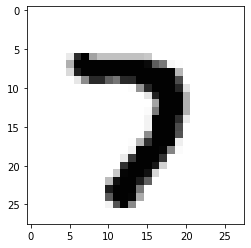

In [ ]:
#Check a couple of images and their corresponding labels.
matplotlib.pyplot.imshow(X_test[9586].reshape([28,28]),cmap='Greys',interpolation='None')

In [ ]:
pred_image = np.expand_dims(X_test[9586], axis=0)
np.argmax(model.predict(pred_image))

7